# Practical Experiment 1 : Practical Experiment: Introduction to Generative AI
 1. Setting Up the Environment for Generative AI and Make use of generative models for creative content generation.
 2. Implement simple probabilistic models like Gaussian Mixture Models.


 **Name:- Nabil Ansari** \
 **PRN/roll no. :- 202302040004**\
 **Course:- GAA LAB**



# 1. Setting Up the Environment for Generative AI and Make use of generative models for creative content generation.

In [ ]:
# Using conda
conda create -n genai-101 python=3.10 -y
conda activate genai-101

# Core scientific + plotting
pip install numpy scipy matplotlib scikit-learn

# For text generation
pip install transformers==4.41 torch --index-url https://download.pytorch.org/whl/cpu

# For a tiny image VAE demo on CPU
pip install torchvision


This setup creates a clean isolated environment called genai-101 (using Python 3.10) to avoid conflicts with other projects, then installs the essential libraries for generative AI work: NumPy, SciPy, Matplotlib, and scikit-learn for scientific computing, statistics, visualization, and basic ML; PyTorch (CPU-only build) as the deep learning framework; Transformers for accessing pretrained text generation models like GPT-2; and Torchvision for working with image datasets (e.g., MNIST) and transformations, which together provide all the core tools needed to experiment with text and image generative models.

# 2. Implement simple probabilistic models like Gaussian Mixture Models.

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def gmm_em(data, K, max_iters=100, tol=1e-6):

    n_samples, n_features = data.shape
    # 1. Initialize mixing coefficients
    mixing_coeffs = np.ones(K) / K

    # Initialize means using K-means for a better start
    from sklearn.cluster import MiniBatchKMeans
    kmeans = MiniBatchKMeans(n_clusters=K, random_state=0, n_init=10)
    kmeans.fit(data)
    means = kmeans.cluster_centers_

    # Initialize covariances
    covariances = [np.eye(n_features) for _ in range(K)]

    log_likelihood_old = -np.inf

    for i in range(max_iters):

        responsibilities = np.zeros((n_samples, K))
        for k in range(K):

            cov_k = covariances[k] + 1e-6 * np.eye(n_features)
            responsibilities[:, k] = mixing_coeffs[k] * multivariate_normal.pdf(data, mean=means[k], cov=cov_k)

        responsibilities_sum = np.sum(responsibilities, axis=1)[:, np.newaxis]
        responsibilities = responsibilities / (responsibilities_sum + 1e-9) # Add epsilon to prevent division by zero

        # 3. M-step (Maximization)
        N_k = np.sum(responsibilities, axis=0) # Sum of responsibilities for each component

        # Update mixing coefficients
        mixing_coeffs = N_k / n_samples

        # Update means
        for k in range(K):
            weighted_sum = np.sum(responsibilities[:, k, np.newaxis] * data, axis=0)
            means[k] = weighted_sum / (N_k[k] + 1e-9)

        # Update covariances
        for k in range(K):
            diff = data - means[k]
            weighted_cov = np.dot((responsibilities[:, k, np.newaxis] * diff).T, diff)
            covariances[k] = weighted_cov / (N_k[k] + 1e-9)

        # Optional: Check for convergence
        log_likelihood_new = np.sum(np.log(responsibilities_sum + 1e-9))
        if np.abs(log_likelihood_new - log_likelihood_old) < tol:
            print(f"Converged after {i+1} iterations.")
            break
        log_likelihood_old = log_likelihood_new

    return mixing_coeffs, means, covariances


if __name__ == '__main__':

    np.random.seed(0)
    mu1 = np.array([0, 0])
    sigma1 = np.array([[1, 0.5], [0.5, 1]])
    data1 = np.random.multivariate_normal(mu1, sigma1, 100)

    mu2 = np.array([5, 5])
    sigma2 = np.array([[1.5, -0.8], [-0.8, 1.5]])
    data2 = np.random.multivariate_normal(mu2, sigma2, 100)

    data = np.vstack((data1, data2))


    K = 2
    mixing_coeffs, means, covariances = gmm_em(data, K)

    print("Parameters:")

    print("\nMeans:")
    print(means)

    print("\nCovariances:")
    for i, cov in enumerate(covariances):
        print(f"Component {i+1}:\n{cov}")

    print("\nMixing Coefficients:")
    print(mixing_coeffs)




Converged after 5 iterations.
Parameters:

Means:
[[ 5.08776655  4.78027425]
 [-0.06893265  0.07422638]]

Covariances:
Component 1:
[[ 1.46338635 -0.77186154]
 [-0.77186154  1.26622263]]
Component 2:
[[1.02405643 0.5311    ]
 [0.5311     1.06975193]]

Mixing Coefficients:
[0.49973022 0.50026971]


# Ploting


**Reasoning**:
Calculate the responsibilities and assign each data point to the component with the highest responsibility.



In [ ]:
responsibilities = np.zeros((data.shape[0], K))
for k in range(K):
    cov_k = covariances[k] + 1e-6 * np.eye(data.shape[1])
    responsibilities[:, k] = mixing_coeffs[k] * multivariate_normal.pdf(data, mean=means[k], cov=cov_k)

assigned_components = np.argmax(responsibilities, axis=1)

## Visualize the data and gmm components

### Subtask:
Create a scatter plot of the data points, colored according to their assigned component. Overlay ellipses representing the learned Gaussian distributions, centered at the means with shapes determined by the covariances.


**Reasoning**:
Generate a scatter plot of the data points colored by their assigned GMM component, and overlay ellipses representing the learned Gaussian distributions.



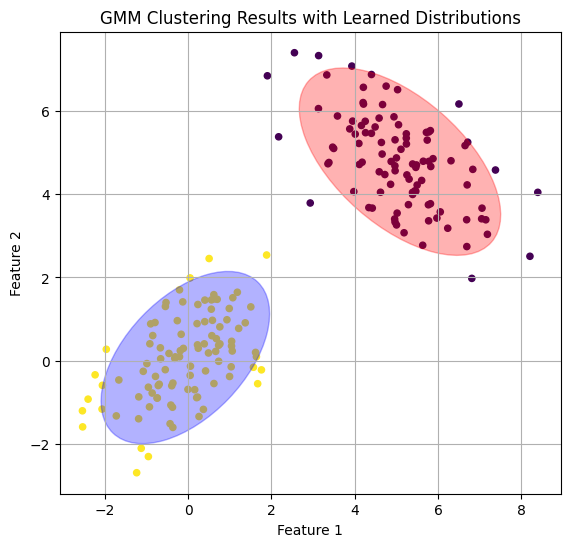

Parameters:

Means:
[[ 5.08776655  4.78027425]
 [-0.06893265  0.07422638]]

Covariances:
Component 1:
[[ 1.46338635 -0.77186154]
 [-0.77186154  1.26622263]]
Component 2:
[[1.02405643 0.5311    ]
 [0.5311     1.06975193]]

Mixing Coefficients:
[0.49973022 0.50026971]


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=assigned_components, cmap='viridis', s=20)

colors = ['red', 'blue']
for k in range(K):
    mean = means[k]
    cov = covariances[k]


    eigenvalues, eigenvectors = np.linalg.eigh(cov)


    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))


    width, height = 2 * np.sqrt(eigenvalues) * 2


    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      color=colors[k % len(colors)], alpha=0.3, fill=True)


    plt.gca().add_patch(ellipse)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GMM Clustering Results with Learned Distributions')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

print("Parameters:")

print("\nMeans:")
print(means)

print("\nCovariances:")
for i, cov in enumerate(covariances):
    print(f"Component {i+1}:\n{cov}")

print("\nMixing Coefficients:")
print(mixing_coeffs)